In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute  import SimpleImputer

In [169]:
df=sns.load_dataset('titanic')
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [170]:
df=df[['age','embarked','survived']]

In [171]:
df

,age,embarked,survived
0,22.0,S,0
1,38.0,C,1
2,26.0,S,1
3,35.0,S,1
4,35.0,S,0
...,...,...,...
886,27.0,S,0
887,19.0,S,1
888,NaN,S,0
889,26.0,C,1


In [172]:
df['embarked'].bfill().value_counts()   #ffill , bfill , 

embarked
S    645
C    169
Q     77
Name: count, dtype: int64

In [173]:
#most frequent

df['embarked'].fillna('S').value_counts() 

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [174]:
#is missing category >10% make lable as  missing

In [175]:
df['embarked'].fillna('Missing').value_counts()

embarked
S          644
C          168
Q           77
Missing      2
Name: count, dtype: int64

In [176]:
df.isnull().sum()

age         177
embarked      2
survived      0
dtype: int64

using simple imputer

In [177]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:2],df.iloc[:,-1],test_size=0.3)

In [178]:
imputer=SimpleImputer(strategy='most_frequent')
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

cat_new_df = pd.DataFrame(X_train_trs, columns=X_train.columns)
cat_new_df.isnull().sum()


embarked    0
dtype: int64

In [179]:
imputer=SimpleImputer(strategy='constant',fill_value='missing')
X_train_trs2=imputer.fit_transform(X_train)
X_test_trs2=imputer.transform(X_test)

cat_new_df2= pd.DataFrame(X_train_trs2, columns=X_train.columns)
cat_new_df2.value_counts()


embarked
S           457
C           116
Q            49
missing       1
Name: count, dtype: int64

Numerical

In [188]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:1],df.iloc[:,-1],test_size=0.3)

In [189]:
# mean /median

imputer=SimpleImputer(strategy='mean')
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

num_new_df1 = pd.DataFrame(X_train_trs, columns=X_train.columns)

In [191]:
imputer=SimpleImputer(strategy='median')
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

num_new_df2 = pd.DataFrame(X_train_trs, columns=X_train.columns)

<Axes: xlabel='age', ylabel='Density'>

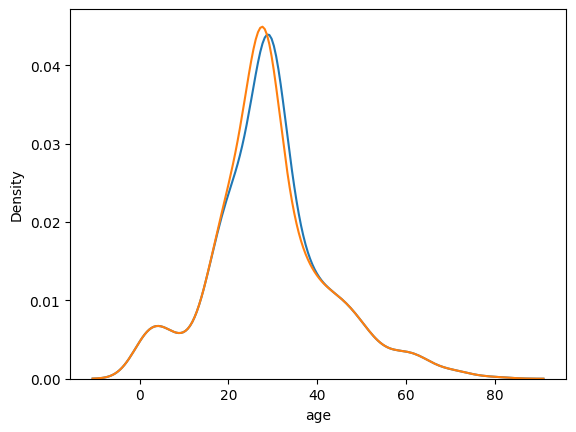

In [219]:
sns.kdeplot(num_new_df1['age'])

sns.kdeplot(num_new_df2['age'])


<Axes: ylabel='Density'>

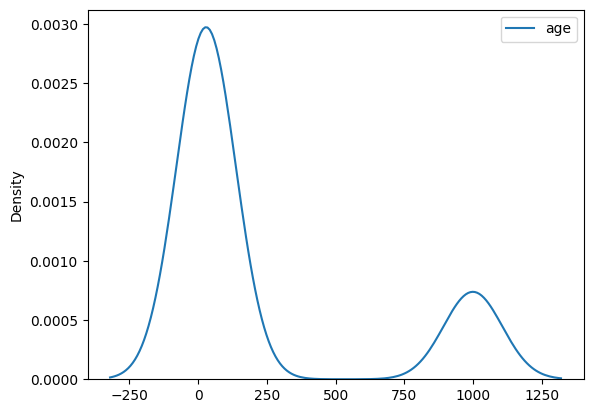

In [205]:
#Arbitrary value imputation

imputer=SimpleImputer(strategy='constant',fill_value=999)
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

num_arbi_df = pd.DataFrame(X_train_trs, columns=X_train.columns)

sns.kdeplot(num_arbi_df)

In [208]:
# end of distribution

(df['age'].mean())-(df['age'].std()*3)

np.float64(-13.880374349943303)

<Axes: ylabel='Density'>

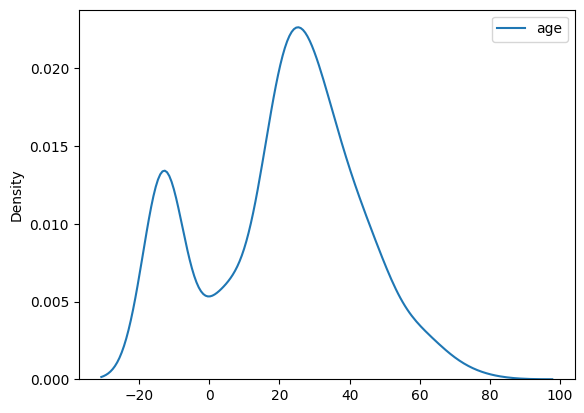

In [209]:
imputer=SimpleImputer(strategy='constant',fill_value=-13)
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

num_arbi_df = pd.DataFrame(X_train_trs, columns=X_train.columns)

sns.kdeplot(num_arbi_df)

In [211]:
#if skewed data

df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [214]:
IQR=(20)-(1.5*(38-20))    # Q1-1.5*IQR
IQR

-7.0

<Axes: ylabel='Density'>

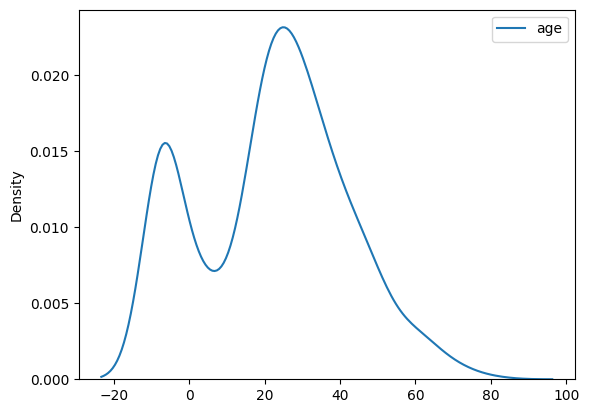

In [213]:
imputer=SimpleImputer(strategy='constant',fill_value=IQR)
X_train_trs=imputer.fit_transform(X_train)
X_test_trs=imputer.transform(X_test)

num_end_df = pd.DataFrame(X_train_trs, columns=X_train.columns)

sns.kdeplot(num_end_df)